<a href="https://colab.research.google.com/github/PabloCGarcia/bioDeepLearning/blob/main/Practico_02A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd

red_wine = pd.read_csv('/content/drive/MyDrive/winequality-red.csv')
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

X = red_wine.copy()
Y = X.pop('quality')

Y.head()

0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64

In [14]:
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

#enc = OneHotEncoder(handle_unknown='ignore')
#Y = Y.to_numpy().reshape(-1, 1)
#enc.fit(Y)
#Y = enc.transform(Y)
#Y = Y.toarray().astype('float32')

X_train, X_valid, Y_train, Y_valid = train_test_split(X, Y, test_size=0.2)

In [15]:
Y.shape

(1599,)

In [21]:
import numpy as np
np.unique(Y)

array([3, 4, 5, 6, 7, 8])

In [42]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(units=512, activation='relu', input_shape=[11]),
    layers.Dense(units=512, activation='relu'),
    layers.Dense(units=512, activation='relu'),
    layers.Dense(units=9, activation="softmax"),
])


In [43]:
model.compile(
            optimizer=keras.optimizers.Adadelta(),
            loss='sparse_categorical_crossentropy',
            metrics=['sparse_categorical_accuracy'])

In [44]:
history = model.fit(
    X_train, Y_train,
    validation_data=(X_valid, Y_valid),
    batch_size=100,
    epochs=100,
)

Epoch 1/100
13/13 [==============================] - 1s 30ms/step - loss: 2.2913 - sparse_categorical_accuracy: 0.0124 - val_loss: 2.2870 - val_sparse_categorical_accuracy: 0.0156
Epoch 2/100
13/13 [==============================] - 0s 18ms/step - loss: 2.2849 - sparse_categorical_accuracy: 0.0111 - val_loss: 2.2819 - val_sparse_categorical_accuracy: 0.0156
Epoch 3/100
13/13 [==============================] - 0s 17ms/step - loss: 2.2842 - sparse_categorical_accuracy: 0.0134 - val_loss: 2.2768 - val_sparse_categorical_accuracy: 0.0156
Epoch 4/100
13/13 [==============================] - 0s 18ms/step - loss: 2.2763 - sparse_categorical_accuracy: 0.0153 - val_loss: 2.2716 - val_sparse_categorical_accuracy: 0.0156
Epoch 5/100
13/13 [==============================] - 0s 18ms/step - loss: 2.2723 - sparse_categorical_accuracy: 0.0073 - val_loss: 2.2665 - val_sparse_categorical_accuracy: 0.0156
Epoch 6/100
13/13 [==============================] - 0s 18ms/step - loss: 2.2622 - sparse_categorica

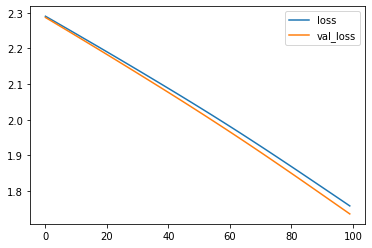

In [45]:
import pandas as pd
history_df = pd.DataFrame(history.history)
history_df[['loss', 'val_loss']].plot();

In [50]:
Y_pred = model.predict(X_valid)

1377    6
503     7
1415    5
1378    6
1370    5
Name: quality, dtype: int64

In [54]:
print(Y_pred[0])
np.argmax(Y_pred[0])

[0.06730346 0.08187468 0.07637952 0.06863711 0.10335622 0.19077082
 0.22805527 0.10193133 0.08169159]


6

In [56]:
Y_pred2 = np.apply_along_axis(np.argmax, 1, Y_pred)

In [58]:
from sklearn.metrics import classification_report
print(classification_report(Y_valid, Y_pred2))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        12
           5       0.56      0.88      0.68       145
           6       0.46      0.34      0.39       124
           7       0.00      0.00      0.00        35
           8       0.00      0.00      0.00         3

    accuracy                           0.53       320
   macro avg       0.17      0.20      0.18       320
weighted avg       0.43      0.53      0.46       320



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
